# Problem Statement: Domain-Agriculture
#A farmer's job is real test of endurance and determination. Usage of Pesticides also plays a vital role in Good Harvest.
#Need to find the outcome for the Harvest Season and 
#Find the crop condition like alive,damaged by the pestcides or damaged by any other means 

In [1]:
#Check the current working Diectory:
import os
os.getcwd()

'F:\\2020\\Hackathon\\Code\\2.Agricultureav'

In [2]:
#Load the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the train and test data:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#We would perform the Exploratory Data Analysis(EDA):

In [4]:
#Check the header for train data:
train_data.head()


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
#Check the header for test data:
test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
#Check the tail for the train Data:
train_data.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [7]:
#Check the tail(last 5 records or observations) for the test data:
test_data.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
59305,F00155937,3337,1,0,2,20,34.0,12,1
59306,F00155940,3516,1,0,2,20,32.0,10,2
59307,F00155941,3702,1,0,2,10,NaN,48,1
59308,F00155943,3702,1,0,2,10,28.0,17,2
59309,F00155944,3895,1,0,2,5,52.0,7,1


In [8]:
#Observations: Data is loaded Properly:

#Check the dimension:

In [9]:
#Check the dimension for the train and test data:
print("Dimension for the train_data:",train_data.shape)
print("Dimension fot the test_data:",test_data.shape)

Dimension for the train_data: (88858, 10)
Dimension fot the test_data: (59310, 9)


In [10]:
#Check the Column Names:
print(train_data.columns)
print("------------------------------------------------------------------")
print(test_data.columns)

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')
------------------------------------------------------------------
Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')


In [11]:
#Check the attributes types:

In [12]:
#Check the attribute types of train_data and test_data:
print("Attributes information about train_data:")
print(train_data.dtypes)
print("--------------------------------------------------------------")
print("Attributes information about test_data:")
print(test_data.dtypes)

Attributes information about train_data:
ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object
--------------------------------------------------------------
Attributes information about test_data:
ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object


In [13]:
#Store the ID column for further mapping:
train_ID = train_data[["ID"]]
test_ID = test_data[["ID"]]
print(train_ID)
print(test_ID)

              ID
0      F00000001
1      F00000003
2      F00000004
3      F00000005
4      F00000006
...          ...
88853  F00155935
88854  F00155938
88855  F00155939
88856  F00155942
88857  F00155945

[88858 rows x 1 columns]
              ID
0      F00000002
1      F00000007
2      F00000011
3      F00000013
4      F00000014
...          ...
59305  F00155937
59306  F00155940
59307  F00155941
59308  F00155943
59309  F00155944

[59310 rows x 1 columns]


In [14]:
#Store the "Target Column:-Crop_Damage" for further mapping:
train_Crop_Damage = train_data[["Crop_Damage"]]

In [15]:
#Convert into Appropriate Data type in train_data:
train_data[["Crop_Type"]] = train_data[["Crop_Type"]].astype(object)
train_data[["Soil_Type"]] = train_data[["Soil_Type"]].astype(object)
train_data[["Pesticide_Use_Category"]] = train_data[["Pesticide_Use_Category"]].astype(object)
train_data[["Season"]] = train_data[["Season"]].astype(object)
train_data[["Crop_Damage"]] = train_data[["Crop_Damage"]].astype(object)

In [16]:
train_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                   object
Soil_Type                   object
Pesticide_Use_Category      object
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                      object
Crop_Damage                 object
dtype: object

In [17]:
#Similar Operation performed in test_data:
#Convert into approprite datatypes:
#Except Crop_Damage because it is the "Target column or label" and not available in test_data
test_data[["Crop_Type"]] = test_data[["Crop_Type"]].astype(object)
test_data[["Soil_Type"]] = test_data[["Soil_Type"]].astype(object)
test_data[["Pesticide_Use_Category"]] = test_data[["Pesticide_Use_Category"]].astype(object)
test_data[["Season"]] = test_data[["Season"]].astype(object)

In [18]:
#Check the datatypes which are converted or not:
test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                   object
Soil_Type                   object
Pesticide_Use_Category      object
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                      object
dtype: object

In [19]:
print("Train_data attribute informations:",train_data.info())
print("----------------Separator-----------------------------")
print("Test_data attribute informations:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  object 
 3   Soil_Type                88858 non-null  object 
 4   Pesticide_Use_Category   88858 non-null  object 
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  object 
 9   Crop_Damage              88858 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 6.8+ MB
Train_data attribute informations: None
----------------Separator-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data colum

# Summary of the Dataset:

In [20]:
#Describe the numerical data in train data:
print("Summary of the Numerical data in train_data:")
train_data.describe()

Summary of the Numerical data in train_data:


,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,88858.000000,88858.000000,79858.000000,88858.000000
mean,1399.012210,25.849952,28.623970,9.589986
std,849.048781,15.554428,12.391881,9.900631
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000
50%,1212.000000,20.000000,28.000000,7.000000
75%,1898.000000,40.000000,37.000000,16.000000
max,4097.000000,95.000000,67.000000,50.000000


In [21]:
#Describe the numerical data in test data:
print("Summary of the Numerical data in test_data:")
test_data.describe()

Summary of the Numerical data in test_data:


,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,59310.000000,59310.000000,53417.000000,59310.000000
mean,1397.014129,25.851880,28.705094,9.528376
std,849.425808,15.481957,12.421211,9.855341
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000
50%,1212.000000,20.000000,28.000000,7.000000
75%,1898.000000,40.000000,38.000000,16.000000
max,4097.000000,95.000000,67.000000,50.000000


In [22]:
#Describe the categorical data in train data:
print("Summary of the Categorical data in train_data:")
train_data.describe(include="object")

Summary of the Categorical data in train_data:


,ID,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
count,88858,88858,88858,88858,88858,88858
unique,88858,2,2,3,3,3
top,F00062539,0,0,2,2,0
freq,1,63589,48124,63709,44210,74238


In [23]:
#Describe the categorical data in train data:
print("Summary of the Categorical data in train_data:")
test_data.describe(include="object")

Summary of the Categorical data in train_data:


,ID,Crop_Type,Soil_Type,Pesticide_Use_Category,Season
count,59310,59310,59310,59310,59310
unique,59310,2,2,3,3
top,F00075868,0,0,2,2
freq,1,42284,32317,42556,29505


In [24]:
#Separate numerical and categorical data for further analysis:
num_attr = ["Estimated_Insects_Count","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit"]
cat_attr = ["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"]
#NOTE:-ID columns could not be used for the calculations and Target column could be used in feature engineering:

In [25]:
#Separate assignment for the categorical data and Numerical data in train dataset:
train_num_attr = train_data[num_attr]
train_cat_attr = train_data[cat_attr]

In [26]:
train_num_attr.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,0,0.0,0
1,209,0,0.0,0
2,257,0,0.0,0
3,257,0,0.0,0
4,342,0,0.0,0


In [27]:
train_cat_attr.head()

,Crop_Type,Soil_Type,Pesticide_Use_Category,Season
0,1,0,1,1
1,1,0,1,2
2,1,0,1,2
3,1,1,1,2
4,1,0,1,2


In [28]:
#Separate assignment for the categorical data and Numerical data in train dataset:
test_num_attr = test_data[num_attr]
test_cat_attr = test_data[cat_attr]

In [29]:
test_num_attr.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,0,NaN,0
1,410,0,0.0,0
2,626,0,0.0,0
3,731,0,0.0,0
4,789,0,0.0,0


In [30]:
test_cat_attr.head()

,Crop_Type,Soil_Type,Pesticide_Use_Category,Season
0,1,1,1,2
1,1,1,1,2
2,1,0,1,2
3,1,0,1,2
4,0,0,1,1


# Missing Value Treatment:

In [31]:
#Missing values in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())

Estimated_Insects_Count       0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
dtype: int64
--------------------------
Crop_Type                 0
Soil_Type                 0
Pesticide_Use_Category    0
Season                    0
dtype: int64


In [32]:
#Missing values in train_num_attr and train_cat_attr in Percentage:
print(train_num_attr.isna().sum()/train_num_attr.shape[0]*100)
print("--------------------------")
print(train_cat_attr.isna().sum()/train_num_attr.shape[0]*100)

Estimated_Insects_Count     0.00000
Number_Doses_Week           0.00000
Number_Weeks_Used          10.12852
Number_Weeks_Quit           0.00000
dtype: float64
--------------------------
Crop_Type                 0.0
Soil_Type                 0.0
Pesticide_Use_Category    0.0
Season                    0.0
dtype: float64


In [33]:
#Number_Weeks_Used column has 10.12% missing Values
#It has only one column which has missing values
#We would use the median values to fill the missing Values
median1 = train_num_attr[["Number_Weeks_Used"]].median()
median1[0]

28.0

In [34]:
#Fill the missing values in train_num_attr:
train_num_attr["Number_Weeks_Used"].replace(np.nan,median1[0],inplace=True)

C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [35]:
train_num_attr.isna().sum()

Estimated_Insects_Count    0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
dtype: int64

In [36]:
#Missing values in test_num_attr and test_cat_attr in Percentage:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

Estimated_Insects_Count    0.00000
Number_Doses_Week          0.00000
Number_Weeks_Used          9.93593
Number_Weeks_Quit          0.00000
dtype: float64
--------------------------
Crop_Type                 0.0
Soil_Type                 0.0
Pesticide_Use_Category    0.0
Season                    0.0
dtype: float64


In [37]:
#Number_Weeks_Used column has missing values:
#Use the Median values to fill the missing values:
median2 = test_num_attr[["Number_Weeks_Used"]].median()
median2

Number_Weeks_Used    28.0
dtype: float64

In [38]:
#Fill the missing Values in test_num_attr:
test_num_attr["Number_Weeks_Used"].replace(np.nan,median2[0],inplace=True)

In [39]:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)

Estimated_Insects_Count    0.0
Number_Doses_Week          0.0
Number_Weeks_Used          0.0
Number_Weeks_Quit          0.0
dtype: float64


In [40]:
#Missing Values has been treated for both the train and test:

# OutlierTreatment:

<AxesSubplot:>

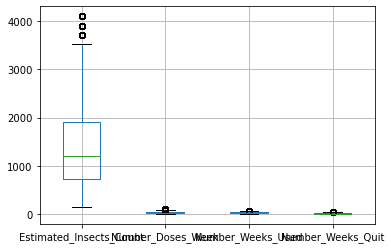

In [41]:
#Use the Box and Whisker Plot:

train_num_attr.boxplot(column = num_attr)

<AxesSubplot:>

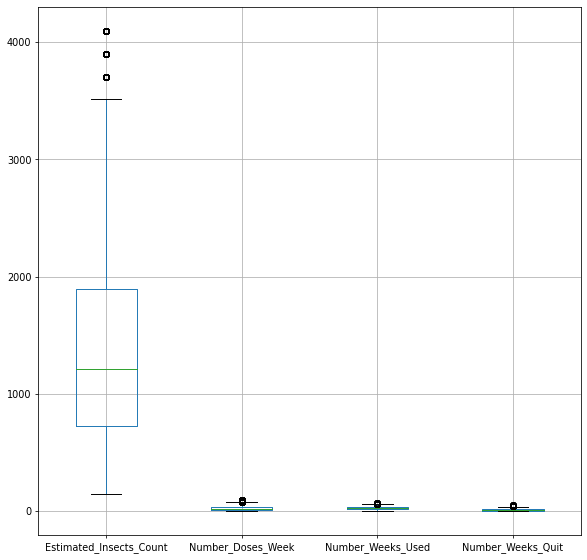

In [42]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [43]:
#It is observed that outlier is present. 
#as per the domain understanding it migh not 
#But statistically it has outlier present.
#We can treat the Outlier by:
#1. Drop the Outlier
#2. Replace the outlier Values using IQR

In [44]:
#Create a user defined function called remove_outlier for getting the threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [45]:
#Remove the Outlier from Estimated_Insect_Count:
lowincome,uppincome=remove_outlier(train_num_attr["Estimated_Insects_Count"])
train_num_attr[["Estimated_Insects_Count"]] = np.where(train_num_attr[["Estimated_Insects_Count"]]>uppincome,uppincome,train_num_attr[["Estimated_Insects_Count"]])
train_num_attr[["Estimated_Insects_Count"]] = np.where(train_num_attr[["Estimated_Insects_Count"]]<lowincome,lowincome,train_num_attr[["Estimated_Insects_Count"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

<AxesSubplot:>

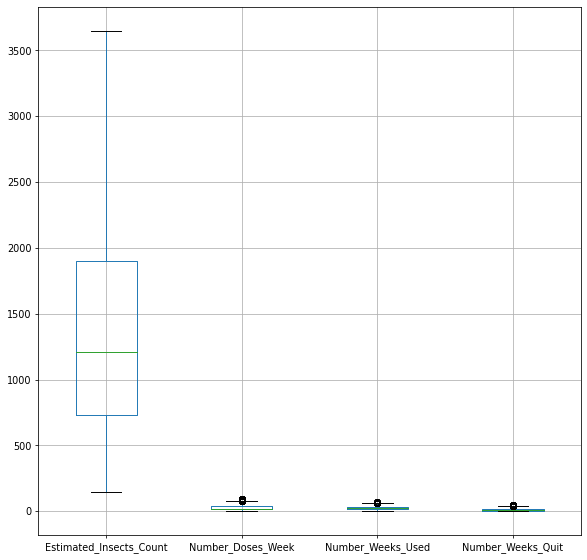

In [46]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [47]:
#Outlier is removed

# Scaling through Standardizations:

In [48]:
from sklearn.preprocessing import StandardScaler
StdScale = StandardScaler()

In [49]:
#Scale the train_num_attr  data(Only Numerical data):
train_num_attr[["Estimated_Insects_Count"]] = StdScale.fit_transform(train_num_attr[["Estimated_Insects_Count"]])
train_num_attr[["Number_Doses_Week"]] = StdScale.fit_transform(train_num_attr[["Number_Doses_Week"]])
train_num_attr[["Number_Weeks_Used"]] = StdScale.fit_transform(train_num_attr[["Number_Weeks_Used"]])
train_num_attr[["Number_Weeks_Quit"]] = StdScale.fit_transform(train_num_attr[["Number_Weeks_Quit"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [50]:
train_num_attr

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,-1.439169,-1.661912,-2.430909,-0.968629
1,-1.414140,-1.661912,-2.430909,-0.968629
2,-1.356931,-1.661912,-2.430909,-0.968629
3,-1.356931,-1.661912,-2.430909,-0.968629
4,-1.255625,-1.661912,-2.430909,-0.968629
...,...,...,...,...
88853,2.313942,-1.019005,-1.409546,3.475557
88854,2.527281,-1.019005,-0.728638,2.869532
88855,2.527281,-0.697551,0.973634,-0.160595
88856,2.685200,-1.019005,-0.303070,0.849447


In [51]:
#Scale the test_num_attr data(Only Numerical data):
test_num_attr[["Estimated_Insects_Count"]] = StdScale.fit_transform(test_num_attr[["Estimated_Insects_Count"]])
test_num_attr[["Number_Doses_Week"]] = StdScale.fit_transform(test_num_attr[["Number_Doses_Week"]])
test_num_attr[["Number_Weeks_Used"]] = StdScale.fit_transform(test_num_attr[["Number_Weeks_Used"]])
test_num_attr[["Number_Weeks_Quit"]] = StdScale.fit_transform(test_num_attr[["Number_Weeks_Quit"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [52]:
test_num_attr.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,-1.423343,-1.669821,-0.053863,-0.966832
1,-1.161988,-1.669821,-2.428804,-0.966832
2,-0.907696,-1.669821,-2.428804,-0.966832
3,-0.784082,-1.669821,-2.428804,-0.966832
4,-0.715800,-1.669821,-2.428804,-0.966832


In [53]:
#Encode the categorical data of train_cat_attr data:
dummies1 = pd.get_dummies(train_cat_attr[["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"]],drop_first=True)
dummies1.head()

,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,1,0,0,0,0,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,1,0,0,1,0
4,1,0,0,0,1,0


In [54]:
dummies2 = pd.get_dummies(test_cat_attr[["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"]],drop_first=True)
dummies2.head()

,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,1,1,0,0,1,0
1,1,1,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,0,1,0
4,0,0,0,0,0,0


In [55]:
#Combine the numerical and Categorical data for train_data:
#Combine the train_num_attr and dummies1:
train_final = pd.concat([train_num_attr,dummies1,train_Crop_Damage],axis=1)
train_final.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3,Crop_Damage
0,-1.439169,-1.661912,-2.430909,-0.968629,1,0,0,0,0,0,0
1,-1.414140,-1.661912,-2.430909,-0.968629,1,0,0,0,1,0,1
2,-1.356931,-1.661912,-2.430909,-0.968629,1,0,0,0,1,0,1
3,-1.356931,-1.661912,-2.430909,-0.968629,1,1,0,0,1,0,1
4,-1.255625,-1.661912,-2.430909,-0.968629,1,0,0,0,1,0,1


In [56]:
train_final.shape

(88858, 11)

In [57]:
#Combine the numerical and Categorical data for train_data:
#Combine the train_num_attr and dummies1:
test_final = pd.concat([test_num_attr,dummies2],axis=1)
test_final.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_1,Soil_Type_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,-1.423343,-1.669821,-0.053863,-0.966832,1,1,0,0,1,0
1,-1.161988,-1.669821,-2.428804,-0.966832,1,1,0,0,1,0
2,-0.907696,-1.669821,-2.428804,-0.966832,1,0,0,0,1,0
3,-0.784082,-1.669821,-2.428804,-0.966832,1,0,0,0,1,0
4,-0.715800,-1.669821,-2.428804,-0.966832,0,0,0,0,0,0


In [58]:
test_final.shape

(59310, 10)

In [59]:
train_final.columns

Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Crop_Type_1', 'Soil_Type_1',
       'Pesticide_Use_Category_2', 'Pesticide_Use_Category_3', 'Season_2',
       'Season_3', 'Crop_Damage'],
      dtype='object')

In [60]:
test_final.columns

Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Crop_Type_1', 'Soil_Type_1',
       'Pesticide_Use_Category_2', 'Pesticide_Use_Category_3', 'Season_2',
       'Season_3'],
      dtype='object')

In [61]:
#We know the target column is "Crop_Damage":
train_final[["Crop_Damage"]].value_counts()

Crop_Damage
0              74238
1              12307
2               2313
dtype: int64

In [62]:
#Data Distribution for the Crop_Damage(Target_Column):
#Value Percentage wise in target column("Crop_Damage"): 
train_final[["Crop_Damage"]].value_counts()/train_final.shape[0]*100

Crop_Damage
0              83.546783
1              13.850188
2               2.603030
dtype: float64

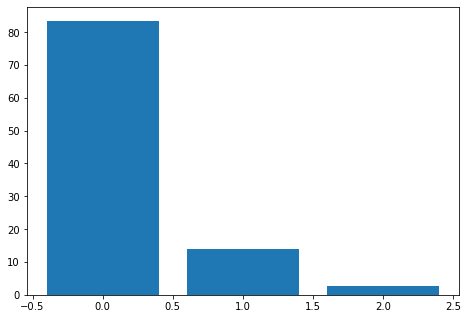

In [63]:
#Data Distribution for Target values:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Crop_damage_type = [0,1,2]
value = [83.55,13.85,2.60]
ax.bar(Crop_damage_type,value)
plt.show()

In [64]:
#Drop the Crop_Damage in train_final data:
train_final.drop(["Crop_Damage"],axis=1,inplace=True)

In [65]:
#Split train_final into train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_final,train_Crop_Damage,test_size=0.20,random_state=100)

In [66]:
#After Observing the Target column which has three levels(0,1,2)
#This is a classification Problem.

# 1. Logistic Regression:

In [67]:
#Build the LogisticRegression:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(solver="lbfgs")
#Build the Model:
LogR.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [68]:
#Predict on X_train itself to verify with the actual result:
pred_X_train = LogR.predict(X_train)

In [69]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_log = LogR.predict(X_test)
pred_test_log = LogR.predict(test_final)

In [70]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_log = classification_report(pred_X_train,y_train)
result_X_test_log = classification_report(pred_X_test_log,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_log)
print("-----Result on Validation Data------")
print(result_X_test_log)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     68649
           1       0.12      0.48      0.19      2437
           2       0.00      0.00      0.00         0

    accuracy                           0.84     71086
   macro avg       0.37      0.44      0.37     71086
weighted avg       0.95      0.84      0.89     71086

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     17187
           1       0.11      0.48      0.18       585
           2       0.00      0.00      0.00         0

    accuracy                           0.83     17772
   macro avg       0.37      0.44      0.36     17772
weighted avg       0.96      0.83      0.89     17772



C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#Concat the test_ID and pred_test:
Sub_Log = pd.concat([test_ID,pd.Series(pred_test_log)],axis=1)

In [72]:
Sub_Log.head()

,ID,0
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [73]:
Sub_Log.rename(columns={0:"Crop_Damage"},inplace=True)

In [74]:
Sub_Log.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [75]:
#Export Result into Local System:
Sub_Log.to_csv("1.Sub_Log.csv",index=False)

In [76]:
#Portal Result shown:
#Your private score for this submission is : 0.838927632055211,

# 2. KNN Classifier

In [77]:
#Build the KNN Model(Modelless) Algorithm:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors = 5,metric = "minkowski",p=2)
#Build the Model:
KNN_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier()

In [78]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_KNN = KNN_class.predict(X_train)

In [79]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_KNN = KNN_class.predict(X_test)
pred_test_KNN = KNN_class.predict(test_final)

In [80]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_KNN = classification_report(pred_X_train_KNN,y_train)
result_X_test_KNN = classification_report(pred_X_test_KNN,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_KNN)
print("-----Result on Validation Data------")
print(result_X_test_KNN)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     65780
           1       0.34      0.64      0.44      5091
           2       0.07      0.59      0.12       215

    accuracy                           0.86     71086
   macro avg       0.46      0.71      0.50     71086
weighted avg       0.93      0.86      0.89     71086

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     16411
           1       0.21      0.41      0.28      1315
           2       0.02      0.22      0.04        46

    accuracy                           0.83     17772
   macro avg       0.40      0.50      0.41     17772
weighted avg       0.90      0.83      0.86     17772



In [81]:
#Concat the test_ID and pred_test:
Sub_KNN = pd.concat([test_ID,pd.Series(pred_test_KNN)],axis=1)

In [82]:
Sub_KNN.head()

,ID,0
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [83]:
#Rename the ColumnName:
Sub_KNN.rename(columns = {0:"Crop_Damage"},inplace=True)

In [84]:
Sub_KNN.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [85]:
#Download into Local System:
Sub_KNN.to_csv("2.sub_KNN.csv",index=False)

In [86]:
#Portal Result:
#Your score for this submission is : 0.8282618662677059,

# 3.Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
GNB_class = GaussianNB()
#Build the Model:
GNB_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [88]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_NB = GNB_class.predict(X_train)

In [89]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_NB = GNB_class.predict(X_test)
pred_test_NB = GNB_class.predict(test_final)

In [90]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_NB = classification_report(pred_X_train_NB,y_train)
result_X_test_NB = classification_report(pred_X_test_NB,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_NB)
print("-----Result on Validation Data------")
print(result_X_test_NB)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     61185
           1       0.27      0.36      0.30      7297
           2       0.12      0.09      0.10      2604

    accuracy                           0.80     71086
   macro avg       0.43      0.44      0.43     71086
weighted avg       0.81      0.80      0.80     71086

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     15338
           1       0.25      0.37      0.30      1772
           2       0.11      0.07      0.08       662

    accuracy                           0.79     17772
   macro avg       0.42      0.44      0.43     17772
weighted avg       0.81      0.79      0.80     17772



In [91]:
#Concat the test_ID and pred_test:
Sub_NB = pd.concat([test_ID,pd.Series(pred_test_NB)],axis=1)

In [92]:
Sub_NB.head()

,ID,0
0,F00000002,0
1,F00000007,0
2,F00000011,0
3,F00000013,0
4,F00000014,0


In [93]:
Sub_NB.rename(columns = {0:"Crop_Damage"},inplace=True)

In [94]:
#Download into Local System:
Sub_NB.to_csv("3.Sub_NB.csv",index=False)

In [95]:
#Prediction On Portal:
#Your score for this submission is : 0.7951545570811516,

# 4. Decision Tree Classifier:

In [96]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
#Build the Model:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_DT = DT.predict(X_train)

In [98]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_DT = DT.predict(X_test)
pred_test_DT = DT.predict(test_final)

In [99]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_DT = classification_report(pred_X_train_DT,y_train)
result_X_test_DT = classification_report(pred_X_test_DT,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_DT)
print("-----Result on Validation Data------")
print(result_X_test_DT)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     60388
           1       0.92      0.97      0.95      9193
           2       0.80      0.99      0.88      1505

    accuracy                           0.98     71086
   macro avg       0.91      0.98      0.94     71086
weighted avg       0.98      0.98      0.98     71086

-----Result on Validation Data------
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     14506
           1       0.27      0.25      0.26      2782
           2       0.07      0.06      0.06       484

    accuracy                           0.75     17772
   macro avg       0.40      0.39      0.39     17772
weighted avg       0.74      0.75      0.74     17772



In [100]:
#Concat the test_ID and pred_test:
Sub_DT = pd.concat([test_ID,pd.Series(pred_test_DT)],axis=1)

In [101]:
Sub_DT.head()

,ID,0
0,F00000002,0
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [102]:
#Rename the Column:
Sub_DT.rename(columns = {0:"Crop_Damage"},inplace=True)

In [103]:
#Download into Local System:
Sub_DT.to_csv("4.Sub_DT.csv",index=False)

In [104]:
#Result on Portal:
#Your score for this submission is : 0.7505369078931493,

# 5. Random Forest:

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Build the Model:
rf.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [106]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_rf = rf.predict(X_train)

In [107]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_rf = rf.predict(X_test)
pred_test_rf = rf.predict(test_final)

In [108]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_rf = classification_report(pred_X_train_rf,y_train)
result_X_test_rf = classification_report(pred_X_test_rf,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_rf)
print("--------------------------Result on Validation Data------")
print(result_X_test_rf)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59760
           1       0.94      0.95      0.95      9608
           2       0.85      0.93      0.89      1718

    accuracy                           0.98     71086
   macro avg       0.93      0.96      0.94     71086
weighted avg       0.98      0.98      0.98     71086

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     16215
           1       0.21      0.39      0.27      1344
           2       0.06      0.13      0.08       213

    accuracy                           0.82     17772
   macro avg       0.41      0.46      0.42     17772
weighted avg       0.88      0.82      0.85     17772



In [109]:
#Concat the test_ID and pred_test:
Sub_rf = pd.concat([test_ID,pd.Series(pred_test_rf)],axis=1)

In [110]:
Sub_rf.head()

,ID,0
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [111]:
Sub_rf.rename(columns={0:"Crop_Damage"},inplace=True)

In [112]:
Sub_rf.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [113]:
#Download into Local System:
Sub_DT.to_csv("5.Sub_rf.csv",index=False)

In [114]:
#Result On Portal:
#0.750536907893149

# 6. GradientBoosting Classifier:

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
#Model building
GB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [116]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_GB = GB.predict(X_train)

In [117]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_GB = rf.predict(X_test)
pred_test_GB = rf.predict(test_final)

In [118]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_GB = classification_report(pred_X_train_GB,y_train)
result_X_test_GB = classification_report(pred_X_test_GB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_GB)
print("--------------------------Result on Validation Data------")
print(result_X_test_GB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     68513
           1       0.15      0.56      0.23      2557
           2       0.01      0.62      0.01        16

    accuracy                           0.85     71086
   macro avg       0.38      0.68      0.39     71086
weighted avg       0.96      0.85      0.89     71086

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     16215
           1       0.21      0.39      0.27      1344
           2       0.06      0.13      0.08       213

    accuracy                           0.82     17772
   macro avg       0.41      0.46      0.42     17772
weighted avg       0.88      0.82      0.85     17772



In [119]:
#Concat the test_ID and pred_test:
Sub_GB = pd.concat([test_ID,pd.Series(pred_test_GB)],axis=1)

In [120]:
Sub_GB.head()

,ID,0
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [121]:
Sub_GB.rename(columns = {0:"Crop_Damage"},inplace=True)

In [122]:
Sub_GB.to_csv("6.Sub_GB.csv",index=False)

In [123]:
#Result On Portal:
#Your score for this submission is : 0.8232185516758765,

# 7.Hist Gradient Boosting Classifier

In [124]:
#NOTE: This is still experiemental:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB = HistGradientBoostingClassifier()
#Build Model:
HGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


HistGradientBoostingClassifier()

In [125]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_HGB = HGB.predict(X_train)

In [126]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_HGB = HGB.predict(X_test)
pred_test_HGB = HGB.predict(test_final)

In [127]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_HGB = classification_report(pred_X_train_HGB,y_train)
result_X_test_HGB = classification_report(pred_X_test_HGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_HGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_HGB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     68094
           1       0.17      0.58      0.27      2943
           2       0.01      0.47      0.02        49

    accuracy                           0.85     71086
   macro avg       0.39      0.64      0.40     71086
weighted avg       0.95      0.85      0.89     71086

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     17003
           1       0.16      0.54      0.25       753
           2       0.01      0.19      0.01        16

    accuracy                           0.84     17772
   macro avg       0.38      0.53      0.39     17772
weighted avg       0.95      0.84      0.89     17772



In [128]:
#Concat the test_ID and pred_test:
Sub_HGB = pd.concat([test_ID,pd.Series(pred_test_HGB)],axis=1)

In [129]:
Sub_HGB.head()

,ID,0
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [130]:
Sub_HGB.rename(columns={0:"Crop_Damage"},inplace=True)

In [131]:
Sub_HGB.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [132]:
Sub_HGB.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [133]:
Sub_HGB.to_csv("7.Sub_HGB.csv",index=False)

In [134]:
#Result on Portal:
#Your score for this submission is : 0.8469390217417533,

# 8. Adaboost Classifier

In [135]:
#Adaboost Classifier:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()
#Build Model:
AD = AD.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [136]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_AD = AD.predict(X_train)

In [137]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_AD = AD.predict(X_test)
pred_test_AD = AD.predict(test_final)

In [138]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_AD = classification_report(pred_X_train_AD,y_train)
result_X_test_AD = classification_report(pred_X_test_AD,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_AD)
print("--------------------------Result on Validation Data------")
print(result_X_test_AD)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     69045
           1       0.11      0.51      0.18      2041
           2       0.00      0.00      0.00         0

    accuracy                           0.84     71086
   macro avg       0.37      0.45      0.36     71086
weighted avg       0.96      0.84      0.89     71086

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     17256
           1       0.11      0.54      0.18       516
           2       0.00      0.00      0.00         0

    accuracy                           0.84     17772
   macro avg       0.37      0.46      0.36     17772
weighted avg       0.96      0.84      0.89     17772



C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
#Concat the test_ID and pred_test_AD:
Sub_AD = pd.concat([test_ID,pd.Series(pred_test_AD)],axis=1)

In [140]:
Sub_AD.head()

,ID,0
0,F00000002,0
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [141]:
Sub_AD.rename(columns = {0:"Crop_Damage"},inplace=True)

In [142]:
Sub_AD.head()

,ID,Crop_Damage
0,F00000002,0
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1


In [143]:
Sub_AD.to_csv("8.Sub_AD.csv",index=False)

In [144]:
#Result On Portal:
#Your score for this submission is : 0.8423783209864627,

# 9. Support Vector machine.

In [ ]:
from sklearn.svm import SVC
#import "LinearSVC "
SVC = SVC()
#Model Building:
SVC.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_SVC = SVC.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVC = SVC.predict(X_test)
pred_test_SVC = SVC.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_SVC = classification_report(pred_X_train_SVC,y_train)
result_X_test_SVC = classification_report(pred_X_test_SVC,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_SVC)
print("--------------------------Result on Validation Data------")
print(result_X_test_SVC)
#classification_report()

In [ ]:
#Concat the test_ID and pred_test_SVC:
Sub_SVC = pd.concat([test_ID,pd.Series(pred_test_SVC)],axis=1)

In [ ]:
Sub_SVC.head()

In [ ]:
Sub_SVC.rename( columns = {0:"Crop_Damage"},inplace=True)

In [ ]:
Sub_SVC.head()

In [ ]:
Sub_SVC.to_csv("9.Sub_SVC.csv",index=False)

In [ ]:
#Portal Result:
#Your score for this submission is : 0.8403272121811732,

# 10.XGBoost Classifier:

In [ ]:
# check xgboost version
import xgboost
print(xgboost.__version__)
#Note: If it is not installed then install using below command:
#sudo pip install xgboost

In [ ]:
#Xgboost Classifier:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()
#Build the Model:
XGB.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_XGB = XGB.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_XGB = XGB.predict(X_test)
pred_test_XGB = XGB.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_XGB = classification_report(pred_X_train_XGB,y_train)
result_X_test_XGB = classification_report(pred_X_test_XGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_XGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_XGB)
#classification_report()

In [ ]:
#Concat the test_ID and pred_test_SVC:
Sub_XGB = pd.concat([test_ID,pd.Series(pred_test_XGB)],axis=1)

In [ ]:
Sub_XGB.head()

In [ ]:
Sub_XGB.rename(columns={0:"Crop_Damage"},inplace=True)

In [ ]:
Sub_XGB.to_csv("10.Sub_XGB.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 0.8466011920561762

# 11.LightGBM¶

In [ ]:
#install the LightGBM:
#!pip install lightgbm
#sudo pip install lightgbm

In [ ]:
#import LightGradient Boosting Machine:
import lightgbm
print(lightgbm.__version__)

In [ ]:
from lightgbm import LGBMClassifier
LGBM= LGBMClassifier()
#Building the Model:
LGBM.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_LGBM = LGBM.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_LGBM = LGBM.predict(X_test)
pred_test_LGBM = LGBM.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_LGBM = classification_report(pred_X_train_LGBM,y_train)
result_X_test_LGBM = classification_report(pred_X_test_LGBM,y_test)
print("--------------------------Result on Train Data for LGBM:-----------")
print(result_X_train_LGBM)
print("--------------------------Result on Validation Data LGBM:------")
print(result_X_test_LGBM)
#classification_report()

In [ ]:
#Concat the test_ID and pred_test_SVC:
Sub_LGBM = pd.concat([test_ID,pd.Series(pred_test_LGBM)],axis=1)

In [ ]:
Sub_LGBM.head()

In [ ]:
Sub_LGBM.rename(columns={0:"Crop_Damage"},inplace=True)

In [ ]:
Sub_LGBM.head()

In [ ]:
Sub_LGBM.to_csv("11.Sub_LGBM.csv",index=False)

In [ ]:
#Result On Portal:
#Your score for this submission is : 0.8476146811129075

# 12.Gradient Boosting with CatBoost

In [ ]:
#It is also third party library:
#Installing catboost:
!pip install catboost
#sudo pip install catboost

In [ ]:
#Check the catboost version:
import catboost
print(catboost.__version__)

In [ ]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
#Build the Model:
catb.fit(X_train,y_train)

In [ ]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_catb = catb.predict(X_train)

In [ ]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_catb = catb.predict(X_test)
pred_test_catb =catb.predict(test_final)

In [ ]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_catb = classification_report(pred_X_train_catb,y_train)
result_X_test_catb = classification_report(pred_X_test_catb,y_test)
print("--------------------------Result on Train Data for Catb:-----------")
print(result_X_train_catb)
print("--------------------------Result on Validation Data Catb:------")
print(result_X_test_catb)
#classification_report()

In [ ]:
#Concat the test_ID and pred_test_catb:
Sub_catb = pd.concat([test_ID,pd.DataFrame(pred_test_catb)],axis=1)

In [ ]:
Sub_catb.head()

In [ ]:
Sub_catb.rename(columns={0:'Crop_Damage'},inplace=True)

In [ ]:
Sub_catb.head()

In [ ]:
Sub_catb.to_csv("12.Sub_catb.csv",index=False)

In [ ]:
#Result on Portal:
#Your score for this submission is : 0.8464564079052146,